In [108]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import os.path as op
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
#videos = pd.read_parquet(op.join("df_metadata_sample_clean.parquet.gzip"), engine="fastparquet")
videos = pd.read_parquet("df_metadata_sample_clean.parquet.gzip", engine="pyarrow")
#videos = pd.read_csv('df_metadata_sample_Pace.csv')

videos

,index,categories,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count,subs_before_video,tags_count,num_comms,description,title
0,676973,Gaming,UCrnftLporTV1YgYbVi7GFsw,31,TqLn2hX6zoA,655,314,2019-03-13,45868.0,30595.541667,15,39.0,Send me your submissions to be featured https:...,Twitch Stream Fails and Epic Moments Compilati...
1,66343748,Sports,UC2EuJ9xTs0XkDZI9YGx7QZA,51,MCEQL6g5EIU,614,468,2017-03-25,29088.0,20086.343750,15,179.0,If Floyd Mayweather vs. Conor McGregor ends up...,Conor McGregor's Best Asset: Undermining Doubt...
2,12315685,Entertainment,UCiJfiEg1FImWsVuEu0L8X6Q,1,l3_IlJr-8_U,30,44,2016-08-18,11506.0,126756.750000,8,0.0,Watch Srirastu Subhamastu telugu movie dailogu...,Srirastu Subhamastu Latest Teaser | Allu Siris...
3,29036231,People & Blogs,UCVptfwYcLxRED8w4Efy0CsA,88,y126khD2Q5k,373,1788,2016-04-05,189885.0,2942.500000,41,125.0,COACHING & TRAINING PLANS\nVisit harryruns.com...,Interval Training: How To Become a Faster Runner
4,56543085,Film & Animation,UCAP57cF-FSjJKzzXg7ntPlQ,0,JCuwthnCRpg,120,380,2019-01-08,7559.0,130292.885417,1,23.0,Now in theatres!,STALKER - Janus Films Trailer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257064,39977981,Gaming,UCN-Klifn9C7kINwpIA0uOHw,2,QhWTZppzqxI,1579,302,2019-02-11,7518.0,305116.869792,13,49.0,🎤 Check out these links! 🎤\nhttp://patreon.com...,[7] Ace Combat 7: Skies Unknown w/ GaLm
1257065,71798200,Gaming,UCskB-HpWs7BAVPvjdJf9-6g,1,1DytQ27ZFCQ,743,15,2015-12-29,116.0,6585.125000,8,19.0,Hey friends it's me KaOs Broly I hope you enjo...,Splatoon - New Piranha Pit Map Gameplay
1257066,35917598,Music,UCQEloCMWEZFep85nHfbbg8Q,0,wiP1xD1Tapc,389,0,2014-01-24,175.0,95064.375000,2,0.0,For more videos click | http://goo.gl/6NU4DG\n...,Haryanvi Krishan Bhajan Sri Radhe Govinda Jug ...
1257067,54370862,People & Blogs,UCBu0KdNokE4MqdkacvH37_A,1,3qmjq0j3-zE,143,1,2019-01-18,55.0,25481.217593,1,0.0,A new ice cream shop in North Texas is turning...,New ice cream shop turning dessert into a fine...


## Define virality

In [3]:
#log scale to adapt to the distributions
videos['virality']=np.log(videos['view_count']+1)/np.log(videos['subs_before_video']+1) 

<AxesSubplot:xlabel='subs_before_video', ylabel='virality'>

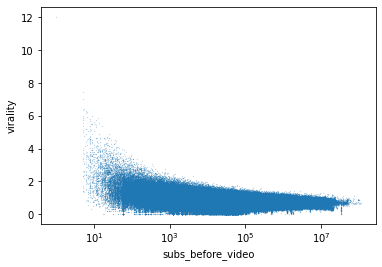

In [104]:
videos.plot.scatter(x='subs_before_video', y='virality',logx=True,s=0.01)

### Is our definition good ? Generally tends to decreases with number of subscribers

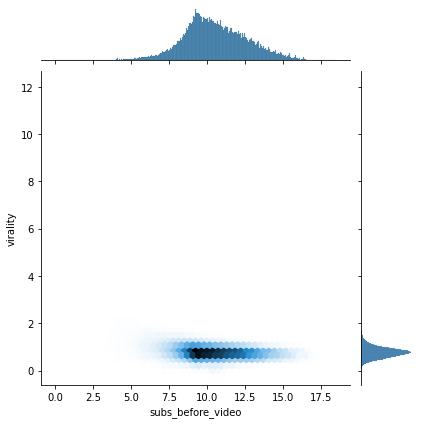

In [114]:
sns.jointplot(x=np.log(videos['subs_before_video']), y=videos['virality'], kind="hex")


### Actually concentrated around exp(9)~=8000  subscribers. Necessity to compute the quantiles (a somewhat equal frequency discretization)

## Appreciation

In [4]:
#Like/dislike ratio
videos['like_ratio']=np.log(videos['like_count']+2)/np.log(videos['dislike_count']+2)

In [5]:
videos

,index,categories,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count,subs_before_video,tags_count,num_comms,description,title,virality,like_ratio
0,676973,Gaming,UCrnftLporTV1YgYbVi7GFsw,31,TqLn2hX6zoA,655,314,2019-03-13,45868.0,30595.541667,15,39.0,Send me your submissions to be featured https:...,Twitch Stream Fails and Epic Moments Compilati...,1.039202,1.646140
1,66343748,Sports,UC2EuJ9xTs0XkDZI9YGx7QZA,51,MCEQL6g5EIU,614,468,2017-03-25,29088.0,20086.343750,15,179.0,If Floyd Mayweather vs. Conor McGregor ends up...,Conor McGregor's Best Asset: Undermining Doubt...,1.037371,1.549693
2,12315685,Entertainment,UCiJfiEg1FImWsVuEu0L8X6Q,1,l3_IlJr-8_U,30,44,2016-08-18,11506.0,126756.750000,8,0.0,Watch Srirastu Subhamastu telugu movie dailogu...,Srirastu Subhamastu Latest Teaser | Allu Siris...,0.795803,3.484980
3,29036231,People & Blogs,UCVptfwYcLxRED8w4Efy0CsA,88,y126khD2Q5k,373,1788,2016-04-05,189885.0,2942.500000,41,125.0,COACHING & TRAINING PLANS\nVisit harryruns.com...,Interval Training: How To Become a Faster Runner,1.521678,1.664508
4,56543085,Film & Animation,UCAP57cF-FSjJKzzXg7ntPlQ,0,JCuwthnCRpg,120,380,2019-01-08,7559.0,130292.885417,1,23.0,Now in theatres!,STALKER - Janus Films Trailer,0.758276,8.577429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257064,39977981,Gaming,UCN-Klifn9C7kINwpIA0uOHw,2,QhWTZppzqxI,1579,302,2019-02-11,7518.0,305116.869792,13,49.0,🎤 Check out these links! 🎤\nhttp://patreon.com...,[7] Ace Combat 7: Skies Unknown w/ GaLm,0.706752,4.123964
1257065,71798200,Gaming,UCskB-HpWs7BAVPvjdJf9-6g,1,1DytQ27ZFCQ,743,15,2015-12-29,116.0,6585.125000,8,19.0,Hey friends it's me KaOs Broly I hope you enjo...,Splatoon - New Piranha Pit Map Gameplay,0.541604,2.578902
1257066,35917598,Music,UCQEloCMWEZFep85nHfbbg8Q,0,wiP1xD1Tapc,389,0,2014-01-24,175.0,95064.375000,2,0.0,For more videos click | http://goo.gl/6NU4DG\n...,Haryanvi Krishan Bhajan Sri Radhe Govinda Jug ...,0.451085,1.000000
1257067,54370862,People & Blogs,UCBu0KdNokE4MqdkacvH37_A,1,3qmjq0j3-zE,143,1,2019-01-18,55.0,25481.217593,1,0.0,A new ice cream shop in North Texas is turning...,New ice cream shop turning dessert into a fine...,0.396753,1.000000


### Preprocess categories to fit Random Forest

In [6]:
onehot=OneHotEncoder()
encoded=onehot.fit_transform(videos[['categories']])
videos[onehot.categories_[0]]=encoded.toarray()
onehot.categories_[0]

array(['Autos & Vehicles', 'Comedy', 'Education', 'Entertainment',
       'Film & Animation', 'Gaming', 'Howto & Style', 'Music',
       'News & Politics', 'Nonprofits & Activism', 'People & Blogs',
       'Pets & Animals', 'Science & Technology', 'Sports',
       'Travel & Events', 'Unknown'], dtype=object)

In [7]:
videos

,index,categories,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count,subs_before_video,...,Howto & Style,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Sports,Travel & Events,Unknown
0,676973,Gaming,UCrnftLporTV1YgYbVi7GFsw,31,TqLn2hX6zoA,655,314,2019-03-13,45868.0,30595.541667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,66343748,Sports,UC2EuJ9xTs0XkDZI9YGx7QZA,51,MCEQL6g5EIU,614,468,2017-03-25,29088.0,20086.343750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12315685,Entertainment,UCiJfiEg1FImWsVuEu0L8X6Q,1,l3_IlJr-8_U,30,44,2016-08-18,11506.0,126756.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29036231,People & Blogs,UCVptfwYcLxRED8w4Efy0CsA,88,y126khD2Q5k,373,1788,2016-04-05,189885.0,2942.500000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,56543085,Film & Animation,UCAP57cF-FSjJKzzXg7ntPlQ,0,JCuwthnCRpg,120,380,2019-01-08,7559.0,130292.885417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257064,39977981,Gaming,UCN-Klifn9C7kINwpIA0uOHw,2,QhWTZppzqxI,1579,302,2019-02-11,7518.0,305116.869792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1257065,71798200,Gaming,UCskB-HpWs7BAVPvjdJf9-6g,1,1DytQ27ZFCQ,743,15,2015-12-29,116.0,6585.125000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1257066,35917598,Music,UCQEloCMWEZFep85nHfbbg8Q,0,wiP1xD1Tapc,389,0,2014-01-24,175.0,95064.375000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1257067,54370862,People & Blogs,UCBu0KdNokE4MqdkacvH37_A,1,3qmjq0j3-zE,143,1,2019-01-18,55.0,25481.217593,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
## Delete columns to save memory

In [9]:
videos.dtypes

index                             int64
categories                     category
channel_id                       object
dislike_count                     int32
display_id                       object
duration                          int64
like_count                        int32
upload_date              datetime64[ns]
view_count                      float64
subs_before_video               float64
tags_count                        int64
num_comms                       float64
description                      object
title                            object
virality                        float64
like_ratio                      float64
Autos & Vehicles                float64
Comedy                          float64
Education                       float64
Entertainment                   float64
Film & Animation                float64
Gaming                          float64
Howto & Style                   float64
Music                           float64
News & Politics                 float64


In [10]:
videos.drop(['categories', 'channel_id','dislike_count','display_id','like_count','upload_date','description','title'], axis=1, inplace=True)

In [11]:
videos.dtypes

index                      int64
duration                   int64
view_count               float64
subs_before_video        float64
tags_count                 int64
num_comms                float64
virality                 float64
like_ratio               float64
Autos & Vehicles         float64
Comedy                   float64
Education                float64
Entertainment            float64
Film & Animation         float64
Gaming                   float64
Howto & Style            float64
Music                    float64
News & Politics          float64
Nonprofits & Activism    float64
People & Blogs           float64
Pets & Animals           float64
Science & Technology     float64
Sports                   float64
Travel & Events          float64
Unknown                  float64
dtype: object

### Random Forest

In [12]:
x=videos[['duration','subs_before_video','like_ratio','tags_count','Autos & Vehicles', 'Comedy', 'Education', 'Entertainment',
       'Film & Animation', 'Gaming', 'Howto & Style', 'Music',
       'News & Politics', 'Nonprofits & Activism', 'People & Blogs',
       'Pets & Animals', 'Science & Technology', 'Sports',
       'Travel & Events', 'Unknown']]
#we include subs before video because maybe a video is still more easily viral for big channels according to our definition
y=videos['virality']

In [13]:
# FITTING Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(x, y) 

RandomForestRegressor(n_estimators=10, random_state=0)

In [15]:
#from platform import python_version

In [16]:
#python_version()

In [96]:
#regressor.estimator_

In [94]:
#PREDICTION
virality_test=regressor.predict([[200, 100000, 1.2, 2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]])[0]

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [95]:
predicted_views=np.exp(virality_test*np.log(100000))
predicted_views

364762.6747919234